In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split  
from sklearn import metrics

from sklearn.linear_model import LinearRegression

In [18]:
train = pd.read_excel('new_data.xlsx', error_bad_lines=False)
train.head(10)

,Name,Director,Total Vote,Year,IMDB score,MC Score,Genre,Column1,_1
0,The Shawshank Redemption,Frank Darabont,2318407,1994,9.3,80.0,Drama,NaN,NaN
1,The Dark Knight,Christopher Nolan,2280614,2008,9.0,84.0,Action,Crime,Drama
2,Inception,Christopher Nolan,2043823,2010,8.8,74.0,Action,Adventure,Sci-Fi
3,Fight Club,David Fincher,1836556,1999,8.8,66.0,Drama,NaN,NaN
4,Pulp Fiction,Quentin Tarantino,1808737,1994,8.9,94.0,Crime,Drama,NaN
5,Forrest Gump,Robert Zemeckis,1787786,1994,8.8,82.0,Drama,Romance,NaN
6,The Matrix,Lana Wachowski,1659036,1999,8.7,73.0,Action,Sci-Fi,NaN
7,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,1643836,2001,8.8,92.0,Action,Adventure,Drama
8,The Lord of the Rings: The Return of the King,Peter Jackson,1627500,2003,8.9,94.0,Action,Adventure,Drama
9,The Godfather,Francis Ford Coppola,1600967,1972,9.2,100.0,Crime,Drama,NaN


In [19]:
train.Director.str.count("Nolan").sum()

10

In [47]:
train['IMDB score'].sum()

7342.6

In [126]:
dircount = train.Director.value_counts()
print(dircount.head(20))

Steven Spielberg      21
Tim Burton            13
Ridley Scott          12
Michael Bay           11
Martin Scorsese       11
Christopher Nolan     10
David Fincher         10
Quentin Tarantino     10
Guy Ritchie            9
Bryan Singer           8
M. Night Shyamalan     8
Robert Zemeckis        7
Jon Favreau            7
Clint Eastwood         7
Peter Jackson          7
Zack Snyder            7
Ron Howard             7
James Mangold          6
Stanley Kubrick        6
J.J. Abrams            6
Name: Director, dtype: int64


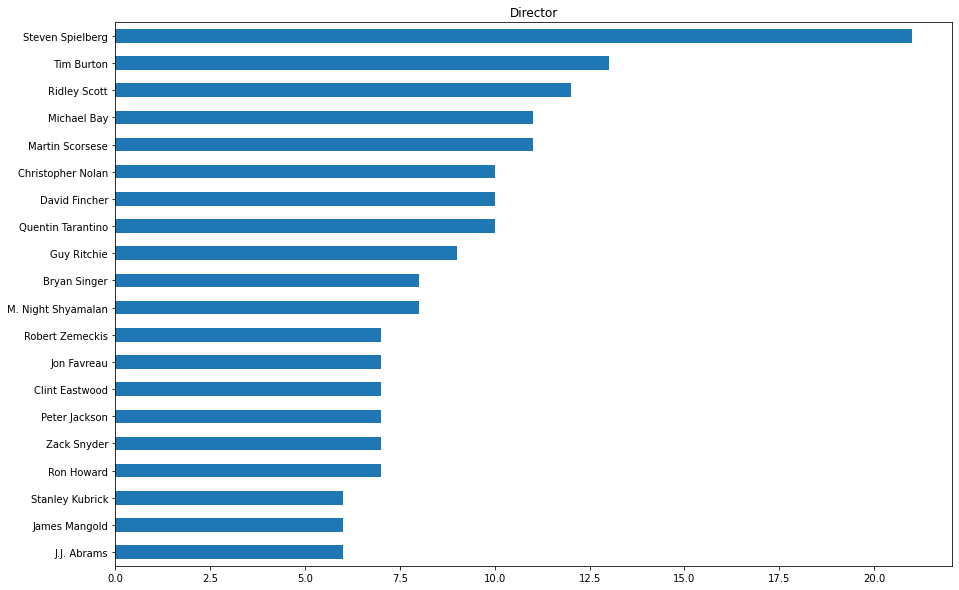

In [21]:
dircount.head(20).sort_values().plot(kind='barh', subplots=True, figsize=(15,10))
plt.savefig('fig1.jpeg', dpi = 150)

In [22]:
genrecount = train.Genre.value_counts()
print(genrecount)

Action                 385
Drama                  121
Comedy                 116
Adventure               73
Animation               70
Crime                   69
Biography               51
Comedy                  35
Drama                   27
Horror                  27
Mystery                  8
Horror                   6
Fantasy                  3
Western                  3
Family                   2
Sci-Fi                   2
Romance                  1
Musical                  1
Name: Genre, dtype: int64


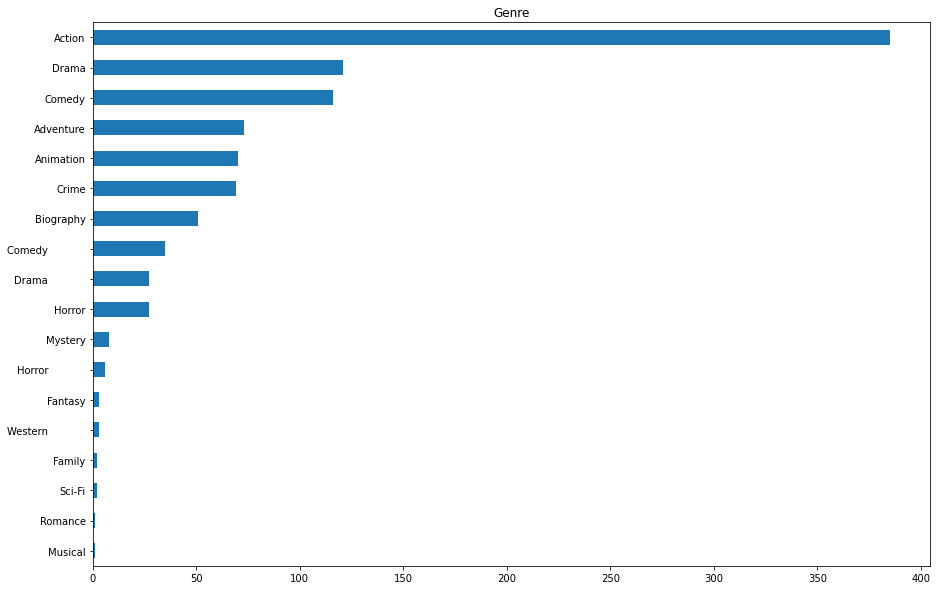

In [23]:
genrecount.sort_values().plot(kind='barh', subplots=True, figsize=(15,10))
plt.savefig('fig2.jpeg', dpi = 150)

In [141]:
test = train['Director'].value_counts().rename_axis('Director').reset_index(name='amount')
dirlist = []
for index, row in test.iterrows():
    dirlist.append(row['Director'])


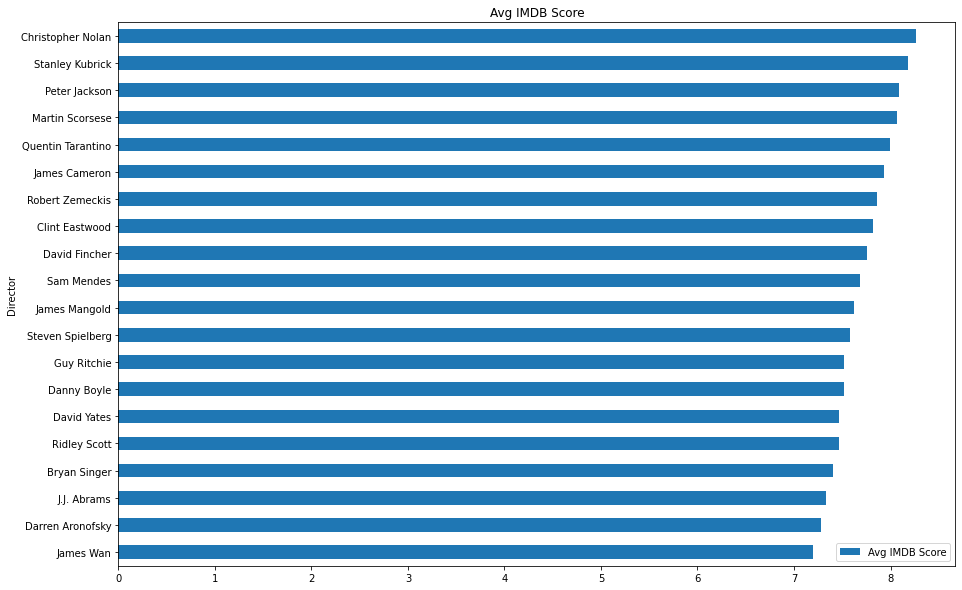

In [142]:
total = len(dirlist)
ccx = []
newdirlist = []
for g in range(total):
    x = train.loc[(train['Director'] == dirlist[g])]
    if len(x['Year']) > 5:
        newdirlist.append(dirlist[g])
        avgrat = x['IMDB score'].sum() / len(x['Year'])
        ccx.append(avgrat)

d = {'Director':newdirlist,'Avg IMDB Score':ccx}
diravg = pd.DataFrame(d)

sort = diravg.sort_values(by=['Avg IMDB Score'], ascending=False)
sort.head(20).sort_values(by=['Avg IMDB Score']).plot(x = 'Director', y = 'Avg IMDB Score', kind='barh', subplots=True, figsize=(15,10))
plt.savefig('fig3.jpeg', dpi = 150)

In [146]:
test2 = train['Genre'].value_counts().rename_axis('Genre').reset_index(name='amount')
genlist = []
for index, row in test2.iterrows():
    genlist.append(row['Genre'])

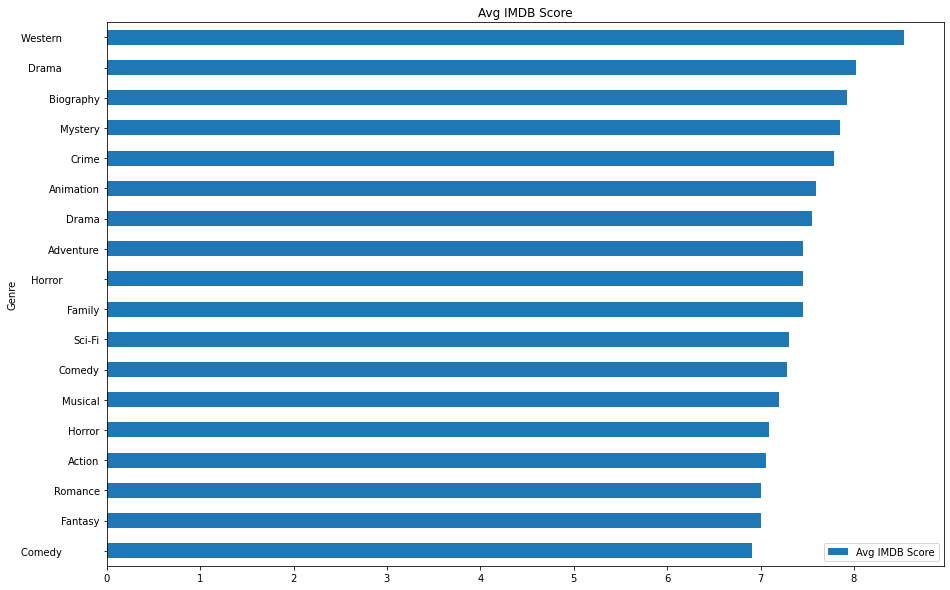

In [148]:
total2 = len(genlist)
ccx3 = []
newgenlist = []
for g in range(total2):
    x3 = train.loc[(train['Genre'] == genlist[g])]
    if len(x3['Year']) > 0:
        newgenlist.append(genlist[g])
        genavg = x3['IMDB score'].sum() / len(x3['Year'])
        ccx3.append(genavg)

d3 = {'Genre':newgenlist,'Avg IMDB Score':ccx3}
genavg = pd.DataFrame(d3)

sort3 = genavg.sort_values(by=['Avg IMDB Score'], ascending=False)
sort3.head(20).sort_values(by=['Avg IMDB Score']).plot(x = 'Genre', y = 'Avg IMDB Score', kind='barh', subplots=True, figsize=(15,10))
plt.savefig('fig5.jpeg', dpi = 150)

    Year  Avg IMDB Score
0   1994        7.846154
1   1995        7.620000
4   1998        7.516667
25  2019        7.484615
5   1999        7.475000
22  2016        7.389189
3   1997        7.356000
10  2004        7.324444
12  2006        7.300000
24  2018        7.291304
6   2000        7.284615
7   2001        7.276667
8   2002        7.262069
2   1996        7.258333
23  2017        7.248485
20  2014        7.219565
15  2009        7.212500
11  2005        7.212121
13  2007        7.176190
9   2003        7.160000
21  2015        7.147059
18  2012        7.140000
16  2010        7.089189
14  2008        7.085417
17  2011        7.067273
19  2013        6.998148


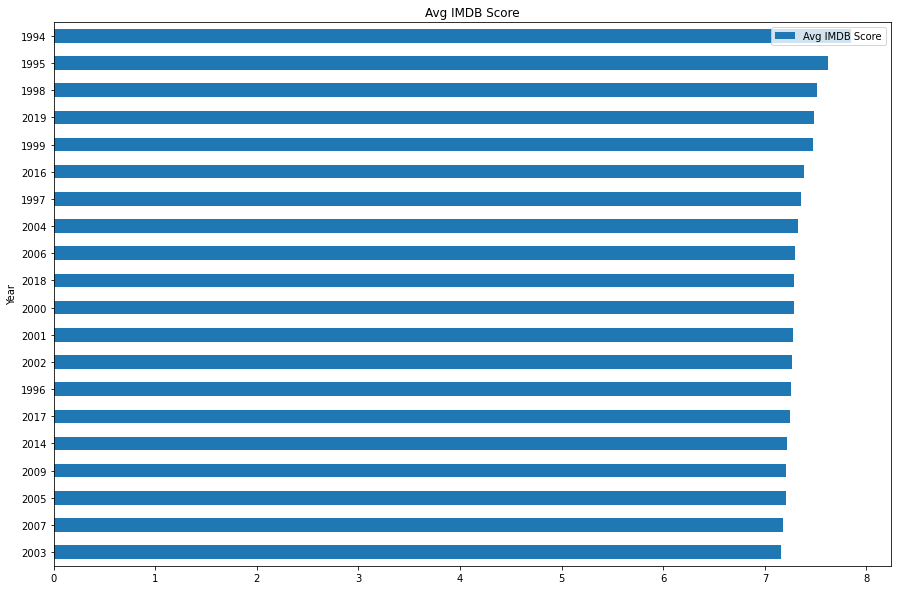

In [137]:
ccx2 = []
year = []
for i in range(1936, 2021):    
    x2 = train.loc[(train['Year'] == i)]
    if len(x2['Year']) > 10:
        year.append(i)
        if x2['IMDB score'].sum()!= 0|len(x2['Year'])!=0:
            yearavg = x2['IMDB score'].sum() / len(x2['Year'])
            ccx2.append(yearavg)
        else:
            ccx2.append(0)
d2 = {'Year':year,'Avg IMDB Score':ccx2}
yearavg = pd.DataFrame(d2)

sort2 = yearavg.sort_values(by=['Avg IMDB Score'], ascending=False)
print(sort2)
sort2.head(20).sort_values(by=['Avg IMDB Score']).plot(x = 'Year', y = 'Avg IMDB Score', kind='barh', subplots=True, figsize=(15,10))
plt.savefig('fig4.jpeg', dpi = 150)

In [138]:
yearcount = train.Year.value_counts()
print(yearcount)

2011    55
2013    54
2012    50
2008    48
2014    46
        ..
1967     1
1969     1
1971     1
1972     1
1936     1
Name: Year, Length: 71, dtype: int64


In [10]:
train.isnull().sum().max()

278

In [11]:
train.describe()

,Total Vote,Year,IMDB score,MC Score
count,1.000000e+03,1000.000000,1000.000000,992.000000
mean,4.016538e+05,2004.020000,7.342600,66.532258
std,2.704351e+05,12.865346,0.743181,15.799608
min,1.858160e+05,1936.000000,3.800000,23.000000
25%,2.293805e+05,2000.000000,6.900000,55.000000
50%,3.070995e+05,2007.000000,7.400000,67.000000
75%,4.676580e+05,2013.000000,7.900000,79.000000
max,2.318407e+06,2020.000000,9.300000,100.000000


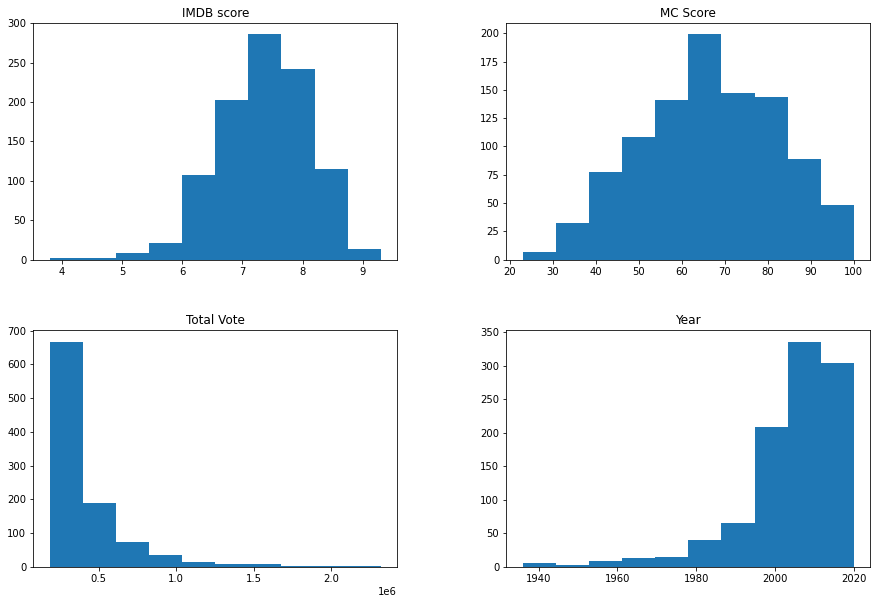

In [12]:
train.hist(bins=10,figsize=(15,10),grid= False);

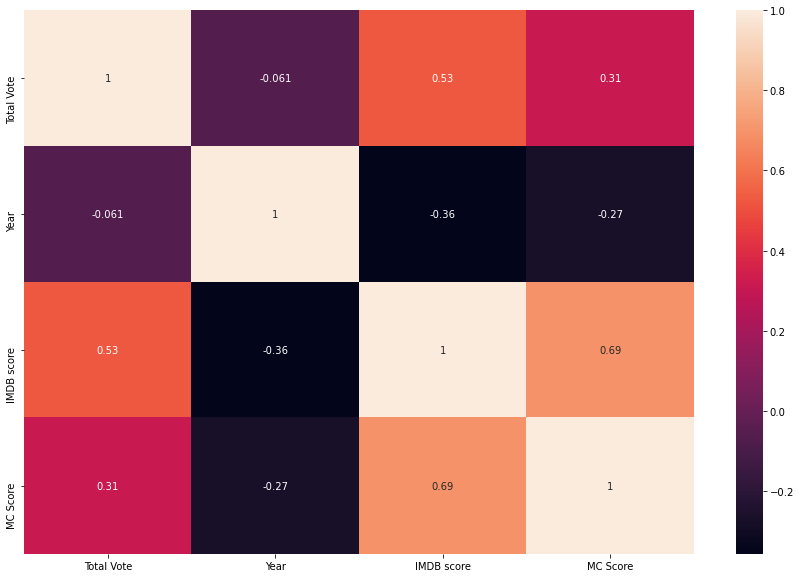

In [8]:
corr = train.corr();
plt.figure(figsize=(15,10));
ax = sns.heatmap(corr, annot=True);